In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from skimage import exposure
from skimage.feature import hog
from skimage.filters import sobel
from utils import ImageDataset

# Change to match data filepath on local
base_fp = '/home/sysung98/MIDS/W281/final_project/rendered_256x256'

In [2]:
def hog_sobel(sketch_img_fp):
    sketch_img = cv2.imread(sketch_img_fp)
    gray = cv2.cvtColor(sketch_img, cv2.COLOR_BGR2GRAY)

    fd, hog_image = hog(
        gray, 
        orientations = 8, 
        pixels_per_cell = (16, 16),
        cells_per_block = (1, 1), 
        visualize = True
    )
    
    min_value = np.min(hog_image)
    max_value = np.max(hog_image)
    hog_image = exposure.rescale_intensity(
        hog_image, 
        in_range=(min_value, max_value), 
        out_range = (0, 1)
    )
    
    return hog_image, sobel(gray)

def get_irl_photo_from_sketch(sketch_img_fp):
    fp_split = sketch_img_fp.split('/')
    picture = fp_split[-1].split('-')[0]
    category = fp_split[-2]
    augmentation = 'tx_000100000000' if fp_split[-3] == 'tx_000100000000' else 'tx_000000000000'
 
    photo_img_fp = fp_split[:-4] + ['photo', augmentation, category, picture + '.jpg']
    return '/'.join(photo_img_fp)
    

def plot_img_sketch_hog(sketch_img_fp):

    photo_img_fp = get_irl_photo_from_sketch(sketch_img_fp)
    photo_img = cv2.imread(photo_img_fp)

    sketch_img = cv2.imread(sketch_img_fp)
    hog_img = hog_sobel(sketch_img_fp)[0]

    plt.figure(figsize=(12,4))

    plt.subplot(1,3,1)
    plt.title('/'.join(photo_img_fp.split('/')[-2:]))
    plt.imshow(photo_img, cmap='gray', vmin=0, vmax=1)

    plt.subplot(1,3,2)
    plt.title('/'.join(sketch_img_fp.split('/')[-2:]))
    plt.imshow(sketch_img, cmap='gray', vmin=0, vmax=1)

    plt.subplot(1,3,3)
    plt.title('HOG Descriptor')
    plt.imshow(hog_img, cmap='gray', vmin=0, vmax=1)

def plot_imgs_per_category_barplt(base_fp, augmentation):
    cat_sketch_img_dict = get_category_to_sketch_img_dict(base_fp, augmentation)

    cat = list(cat_sketch_img_dict.keys())
    img_ct = list(map(lambda x: len(x), cat_sketch_img_dict.values()))

    cat_sketch_img_pd = pd.DataFrame({'img_ct': img_ct}, index=cat).sort_index()

    fig, ax = plt.subplots(figsize=(20,5))
    cat_sketch_img_pd['img_ct'].plot(kind='bar', linewidth=5)
    plt.title("Number of Images per Category")
    ax.set_yticks([300, 400, 500, 600, 700, 800])
    plt.ylim(300, 800)
    plt.tick_params(axis='x', which='major', labelsize=9)
    plt.xticks(rotation = 90)
    plt.show()

def get_all_sketch_img_fp(base_fp, augmentation):
    sketch_img_fp = base_fp + '/256x256/sketch/' + augmentation
    img_fp_list = []


    for categories in os.listdir(sketch_img_fp):
        category_fp = '/'.join([sketch_img_fp, categories])

        for img in os.listdir(category_fp):
            img_fp  = category_fp + '/' + img
            img_fp_list.append(img_fp)

    return img_fp_list

def get_category_to_sketch_img_dict(base_fp, augmentation):
    cat_sketch_img_dict = {}
    for i in get_all_sketch_img_fp(base_fp, augmentation):
        split_fp = i.split('/')
        category = split_fp[-2]
        img_name = split_fp[-1]

        if category not in cat_sketch_img_dict:
            cat_sketch_img_dict[category] = [img_name]
        else:
            cat_sketch_img_dict[category].append(img_name)
    return cat_sketch_img_dict

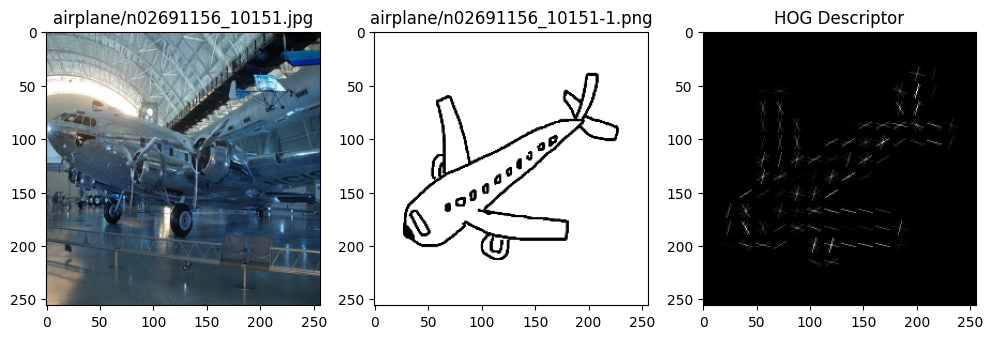

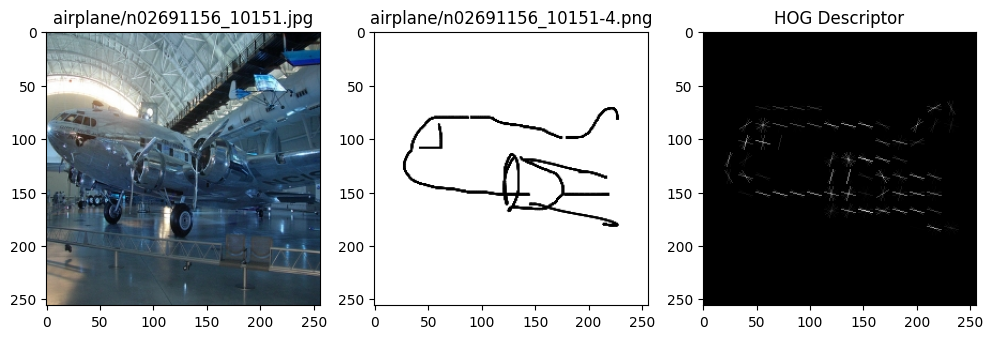

In [3]:
augmentation = 'tx_000100000000'
img_fp = sorted(get_all_sketch_img_fp(base_fp, augmentation))

for i in img_fp[:5]:
    plot_img_sketch_hog(i)

In [4]:
plot_imgs_per_category_barplt(base_fp, augmentation)

In [1]:
from utils import ImageDataset
base_fp = '/home/sysung98/MIDS/W281/final_project/rendered_256x256'

dataset = ImageDataset(base_fp)

print('Getting labeled data')
X, Y = dataset.get_img_label_dataset()
print(X.shape)
print(Y.shape)

Loading dataset...
Getting labeled data
/home/sysung98/MIDS/W281/final_project/rendered_256x256/256x256/photo/tx_000100000000/dolphin/n02072040_2259.jpg dolphin (256, 256, 3)
/home/sysung98/MIDS/W281/final_project/rendered_256x256/256x256/photo/tx_000000000000/dolphin/n02072040_2259.jpg dolphin (256, 256, 3)
/home/sysung98/MIDS/W281/final_project/rendered_256x256/256x256/sketch/tx_000000001010/dolphin/n02072040_2259-5.png dolphin (256, 256, 3)
/home/sysung98/MIDS/W281/final_project/rendered_256x256/256x256/sketch/tx_000000001010/dolphin/n02072040_2259-6.png dolphin (256, 256, 3)
/home/sysung98/MIDS/W281/final_project/rendered_256x256/256x256/sketch/tx_000000001010/dolphin/n02072040_2259-1.png dolphin (256, 256, 3)
/home/sysung98/MIDS/W281/final_project/rendered_256x256/256x256/sketch/tx_000000001010/dolphin/n02072040_2259-4.png dolphin (256, 256, 3)
/home/sysung98/MIDS/W281/final_project/rendered_256x256/256x256/sketch/tx_000000001010/dolphin/n02072040_2259-2.png dolphin (256, 256, 3)


KeyboardInterrupt: 